In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
from collections import defaultdict
import datetime as dt

In [4]:
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.inspection import inspect
from sqlalchemy import desc

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
#start_date = 05/26/2017
#end_date = 06/04/2017

# Exploratory Climate Analysis

In [12]:
st_date_str = "2017-08-23" 
print(type(st_date_str))
st_date = dt.datetime.strptime(st_date_str, '%Y-%m-%d')
print(st_date)

<class 'str'>
2017-08-23 00:00:00


In [14]:
# Calculate the date 1 year ago from the last data point in the database
dateprevyr = st_date - relativedelta(years=1)
print(dateprevyr)

2016-08-23 00:00:00


In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precip_data = session.query(Measurement.date,Measurement.prcp).\
                   filter(Measurement.date > dateprevyr).all()
date_lst=list()
prcp_lst=list()
cnt=0
for row in precip_data:
    cnt+=1
    date_lst.append(row.date)
    prcp_lst.append(row.prcp)
    if cnt % 500 == 0 :
        print(row.date, row.prcp)

type(precip_data)
print("Count of rows: ", str(cnt))
precip_data_dict={"date":date_lst,"Precipitation":prcp_lst}

2017-01-10 0.0
2017-08-16 0.0
2017-07-26 0.0
2016-12-30 2.37
Count of rows:  2223


In [16]:
# Perform a query to retrieve the data and precipitation scores

precip_data_df = pd.DataFrame(precip_data_dict)
precip_data_df = precip_data_df.rename(columns={"prcp":"Precipitation"})
precip_data_df.head(1)

,date,Precipitation
0,2016-08-24,0.08


In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
precip_data_df = precip_data_df.sort_values("date")
precip_data_df

,date,Precipitation
0,2016-08-24,0.08
1006,2016-08-24,NaN
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15
1875,2016-08-24,1.45
1188,2016-08-24,1.22
1,2016-08-25,0.08
1007,2016-08-25,0.00
1525,2016-08-25,0.06


In [19]:
precip_data_df.set_index("date",drop=True,inplace=True)
precip_data_df.columns
precip_data_df.tail()

,Precipitation
date,
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.00
2017-08-23,0.45


In [22]:
precip_data_df1=precip_data_df.copy()
precip_data_df1.reset_index(inplace=True,drop=False)
precip_data_df1.head(1)
precip_data_df1.tail(1)

,date,Precipitation
2222,2017-08-23,0.45


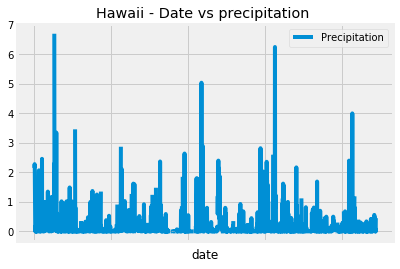

In [24]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_data_df1.plot(x="date",y="Precipitation",kind="line",ax=None,legend=True,title="Hawaii - Date vs precipitation ")

In [27]:
plt.savefig("Images\Precipitation.png")
plt.show()

<Figure size 432x288 with 0 Axes>

In [28]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_data_df2=precip_data_df1[["date","Precipitation"]]
precip_data_df2.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [31]:
# Design a query to show how many stations are available in this dataset?
station_data = session.query(Station.station).distinct().all()

cnt=0
for row in station_data:
    #print(row.station)
    cnt+=1
    if cnt > 10:
        break
        
station_cnt = session.query(Measurement.station).distinct().count()
station_cnt

9

In [32]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_cnts_desc = session.query(Measurement.station,func.count(Measurement.station).label("scount")).\
                    group_by(Measurement.station).\
                    order_by(desc("scount")).\
                    all()
station_cnts_desc 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [34]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
(station_max , count_max) = station_cnts_desc[0]
print(station_max,count_max)

station_temp_stats = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                     filter(Measurement.station == station_max).\
                     all()
station_temp_stats

USC00519281 2772


[(54.0, 85.0, 71.66378066378067)]

In [35]:
station_temps = session.query(Measurement.tobs).\
                     filter(Measurement.date > dateprevyr).\
                     filter(Measurement.station ==  station_max).\
                     all()
station_temps[0:3]

[(77.0), (80.0), (80.0)]

In [36]:
temp_list=list()
frequency=list()
cntrows=0
for row in station_temps:
    cntrows+=1
    temp, = row
    temp_list.append(temp)

print(str(len(temp_list)))

351


In [37]:
temp_freq_dict={"Temperature":temp_list }
temp_freq_df=pd.DataFrame(temp_freq_dict)
temp_freq_df.tail(2)

,Temperature
349,76.0
350,79.0


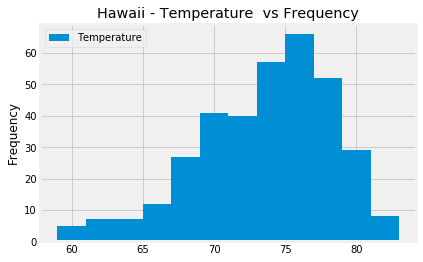

In [38]:
temp_freq_df.plot.hist(by="Temperature", bins=12,title="Hawaii - Temperature  vs Frequency" )

In [39]:
plt.savefig("Images\Temperature-vs-Frequency.png")
plt.show() 

<Figure size 432x288 with 0 Axes>

In [ ]:
st_date_inp  = input("input a start date in yyyy-mm-dd format")
end_date_inp = input("input an end  date in yyyy-mm-dd format")
try:
    st_date_conv =  dt.datetime.strptime(st_date_inp, '%Y-%m-%d')
    end_date_conv = dt.datetime.strptime(end_date_inp, '%Y-%m-%d')
    print(st_date_conv,end_date_conv)
  
except:
    print("invalid date or date format. Please input valid date in yyyy-mm-dd format. Using default dates. ")
    print(st_date_inp)
    st_date_inp   = '2017-08-21'
    st_date_conv  = dt.datetime.strptime(st_date_inp, '%Y-%m-%d')
    end_date_conv = dt.datetime.today().strftime('%Y-%m-%d')
    print(st_date_conv, end_date_conv)

input a start date in yyyy-mm-dd format08-23-2017


In [ ]:
Meas_temp_st = session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs)).\
                     filter(Measurement.date >= st_date_conv).\
                     filter(Measurement.date <= end_date_conv).\
                     all()
                             
print(Meas_temp_st)

In [40]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


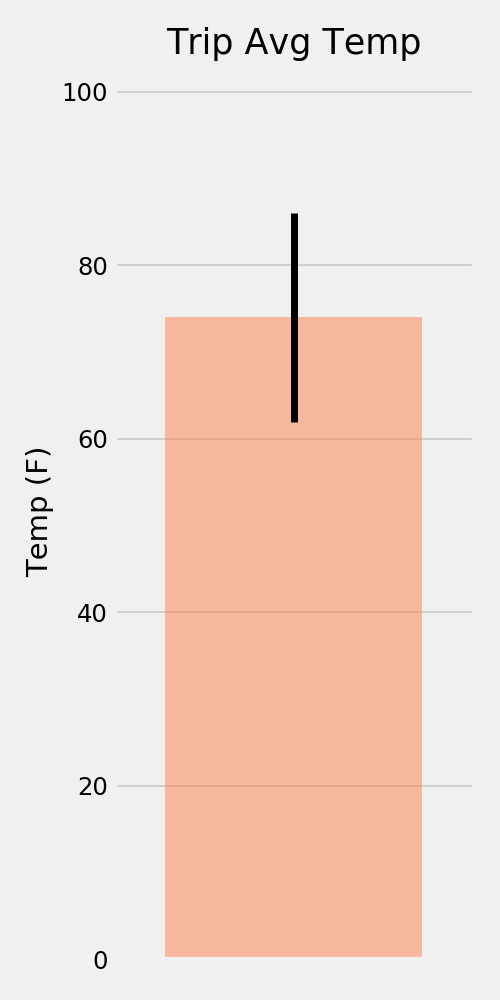

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]
